In [18]:
You are tasked with analyzing a dataset of student exam scores. The goal is to determine whether the exam preparation program significantly improved scores and to assess the distribution of the scores using skewness and kurtosis.

Scenario A group of students participated in a preparation program. Their scores before and after the program were recorded. You will: Perform a paired t-test to determine if the program significantly improved scores. Calculate the skewness of the post-program scores to assess symmetry. Calculate the kurtosis of the post-program scores to evaluate the presence of outliers or the sharpness of the distribution peak. Draw conclusions from these findings.

Tasks

Paired t-test Perform a paired t-test on the pre-program and post-program scores to determine if there is a significant improvement. Null Hypothesis (H0H_0): There is no difference in the scores before and after the program. Alternative Hypothesis (H1H_1): The scores after the program are significantly higher than before.

Skewness Calculate the skewness of the post-program scores. Based on the value: Skewness ~ 0: The distribution is symmetric. Positive skewness: The distribution has a longer tail on the right. Negative skewness: The distribution has a longer tail on the left.

Kurtosis Calculate the kurtosis of the post-program scores. Based on the value: Kurtosis ~ 3: The distribution is normal (mesokurtic). Kurtosis > 3: The distribution is sharp with heavy tails (leptokurtic). Kurtosis < 3: The distribution is flat with light tails (platykurtic).

Draw Conclusions Based on the t-test, skewness, and kurtosis findings, write a short report answering: Did the preparation program significantly improve scores? Are the post-program scores symmetrically distributed? Are there any outliers or unusual patterns in the post-program scores?

SyntaxError: invalid syntax (1364746937.py, line 1)

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel
# Create a larger dataset
data = {
    "Student_ID": list(range(1, 51)),  # 50 students
    "Pre_Program_Score": [
        65, 70, 68, 72, 64, 66, 74, 68, 71, 75,
        62, 67, 69, 73, 65, 70, 76, 66, 74, 72,
        60, 63, 68, 70, 64, 62, 75, 69, 71, 77,
        63, 65, 72, 74, 68, 64, 66, 70, 72, 75,
        61, 64, 67, 73, 68, 65, 72, 69, 74, 78
    ],
    "Post_Program_Score": [
        72, 75, 74, 78, 70, 72, 80, 74, 76, 80,
        68, 73, 75, 79, 71, 75, 82, 72, 78, 77,
        65, 69, 74, 76, 70, 67, 80, 74, 76, 82,
        68, 70, 78, 80, 74, 70, 72, 76, 78, 81,
        66, 70, 73, 79, 74, 71, 78, 75, 80, 85
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV (optional, if you want to load later)
df.to_csv("student_scores.csv", index=False)

# Display first few rows
print(df.head())

   Student_ID  Pre_Program_Score  Post_Program_Score
0           1                 65                  72
1           2                 70                  75
2           3                 68                  74
3           4                 72                  78
4           5                 64                  70


In [ ]:
from scipy import stats
Pre_Score = df['Pre_Program_Score']
Post_Score = df['Post_Program_Score']

pre_score_mean = Pre_Score.mean()
post_score_mean = Post_Score.mean()
print(f"Mean Pre-Program Score: {pre_score_mean}")
print(f"Mean Post-Program Score: {post_score_mean}")

tstat, pval = stats.ttest_rel(Pre_Score, Post_Score)
print(f"T-statistic: {tstat}")
print(f"P-value: {pval}")

Mean Pre-Program Score: 68.92
Mean Post-Program Score: 74.64
T-statistic: -70.60509614744568
P-value: 5.880696260806754e-51


Skewness of Post-Program Scores (Square Root Transformed): -0.09083578864580173


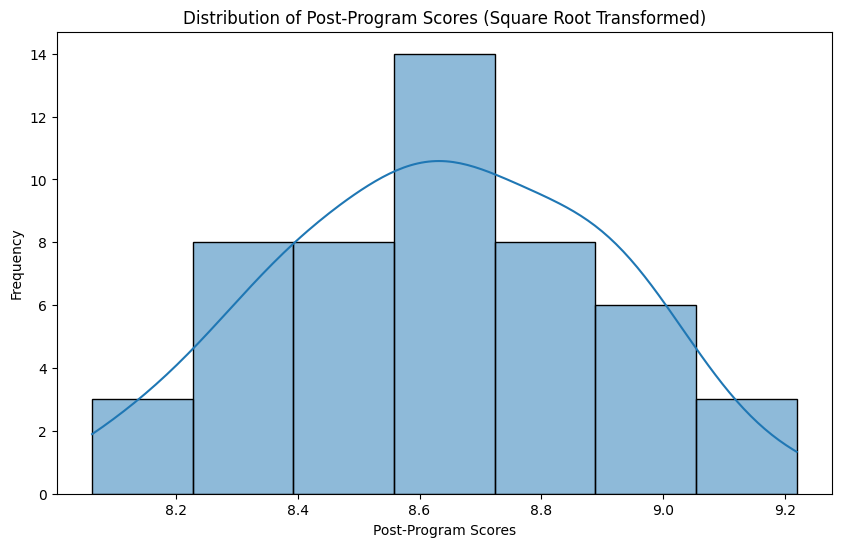

In [ ]:
# Skewness Calculate the skewness of the post-program scores. Based on the value: Skewness ~ 0: The distribution is symmetric. Positive skewness: The distribution has a longer tail on the right. Negative skewness: The distribution has a longer tail on the left.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply the square root transformation to the specific column
sqrt_df = df.copy()  # Copy the dataframe to avoid modifying the original
sqrt_df['Post_Program_Score'] = np.sqrt(df['Post_Program_Score'])

# Calculate skewness of the transformed column
skewness = sqrt_df['Post_Program_Score'].skew()
print(f"Skewness of Post-Program Scores (Square Root Transformed): {skewness}")

# Plot the distribution of the transformed column
plt.figure(figsize=(10, 6))
sns.histplot(sqrt_df['Post_Program_Score'], kde=True)
plt.title('Distribution of Post-Program Scores (Square Root Transformed)')
plt.xlabel('Post-Program Scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import kurtosis


post_program_kurtosis = kurtosis(df['Post_Program_Score'])
print("Post Program Kurtosis:", post_program_kurtosis)

if abs(post_program_kurtosis-3) < 0.5:
    print("The distribution of the post program scores is approximately normal.")
elif post_program_kurtosis > 3:
    print("The distribution of the post program scores is leptokurtic (heavy-tailed).")
else:
    print("The distribution of the post program scores is platykurtic (light-tailed).")


Post Program Kurtosis: -0.6159711119863349
The distribution of the post program scores is platykurtic (light-tailed).


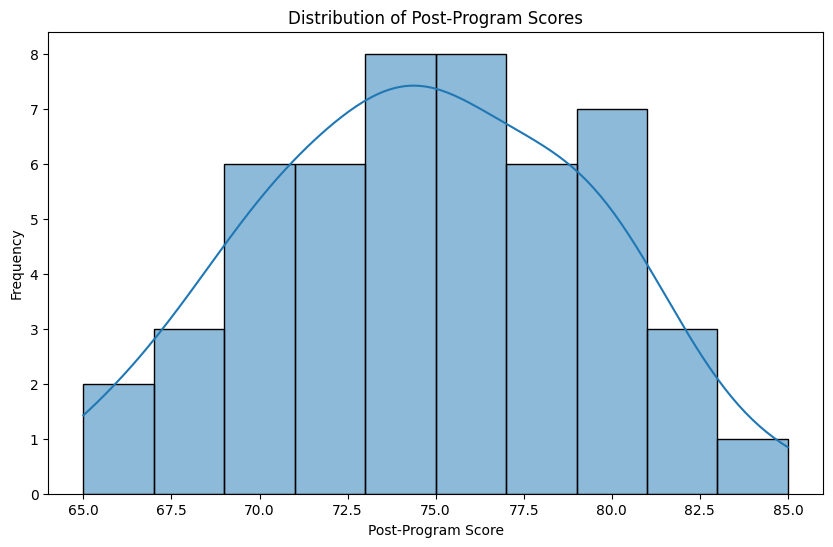

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Post_Program_Score'], bins=10,kde=True)
plt.title('Distribution of Post-Program Scores')
plt.xlabel('Post-Program Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x=[1, 2, 3], y=[4, 5, 6])
fig.show()


# Intro to SCIPY

1. Use NumPy to create a large random array of floating-point numbers.

2. Compute the mean and standard deviation using both NumPy and SciPy.

3. Compare the results and execution time to understand the efficiency or additional features provided by SciPy.

# Question: Advanced Data Analysis on the tips Dataset
- Scenario:
You are tasked with analyzing the tips dataset to uncover insights about customer behavior at a restaurant. Your analysis must focus on creating new features, understanding relationships between existing features, and summarizing trends using statistical tools.

Tasks
1. Feature Engineering
Create and analyze the following new features:

Tip Percentage: Calculate the percentage of the tip relative to the total bill for each observation.
Bill Per Person: Normalize the total bill by the size of the dining party.
Questions:

Which day of the week has the highest average tip percentage?
Is the bill per person higher on weekends compared to weekdays? Use visualizations to justify your conclusion.

2. Correlation and Covariance
Analyze the relationships between numerical variables in the dataset.

Questions:

Which variables have the strongest correlation? What does this indicate about their relationship?
Which pair of variables shows the highest covariance? How does this differ from correlation?
Create a heatmap for correlation and explain the key relationships observed.

3. Integration Using SciPy
Simulate a cumulative distribution of tips to understand tipping trends.

Questions:

Use integration (Simpson’s rule) to compute the total "effective" tips collected over the entire dataset.
What does this integrated value represent in terms of restaurant revenue or customer behavior?
Expected Deliverables
Code that implements feature engineering, correlation, covariance, and integration.
Visualizations for new features, correlation heatmap, and tip trends.
Insights derived from the analysis.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.integrate import simpson

# Load the dataset
tips = sns.load_dataset("tips")
# Display basic information
print(tips.info())
print(tips.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Before Log Transformation:
total_bill - Skewness: 1.13, Kurtosis: 1.17
tip - Skewness: 1.46, Kurtosis: 3.55
size - Skewness: 1.44, Kurtosis: 1.67

After Log Transformation:
total_bill - Skewness: -0.01, Kurtosis: 0.20
tip - Skewness: 0.38, Kurtosis: -0.01
size - Skewness: 0.94, Kurtosis: 0.32


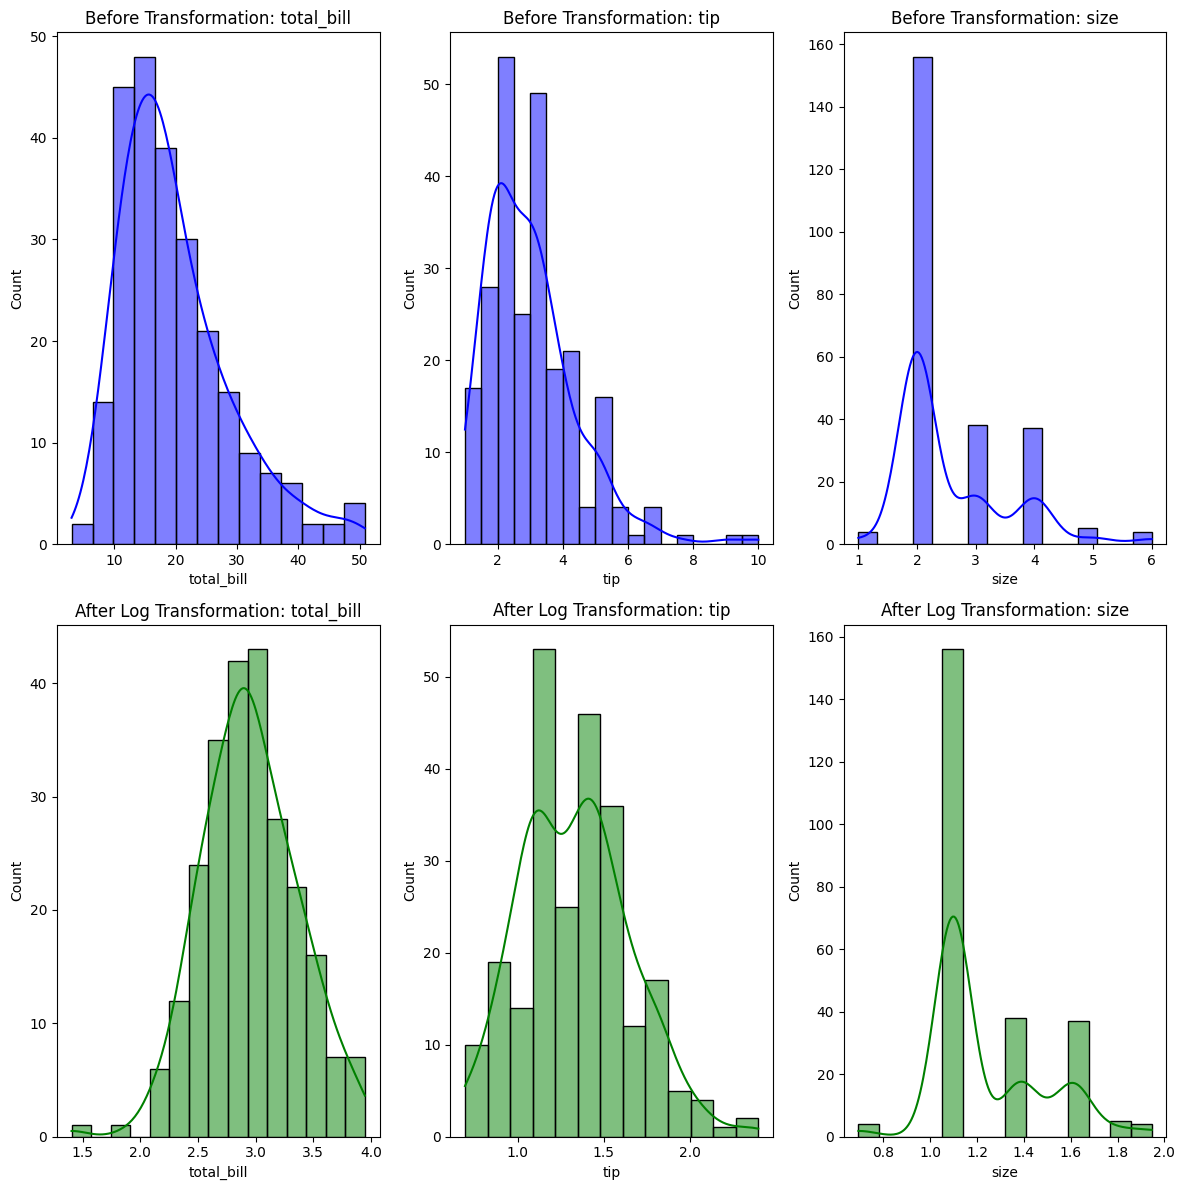

In [20]:
# 1. Feature Engineering
# Create and analyze the following new features:

# Tip Percentage: Calculate the percentage of the tip relative to the total bill for each observation.
# Bill Per Person: Normalize the total bill by the size of the dining party.
# Questions:

# Which day of the week has the highest average tip percentage?
# Is the bill per person higher on weekends compared to weekdays? Use visualizations to justify your conclusion.

from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate Skewness and Kurtosis Before Transformation
numerical_cols = ["total_bill", "tip", "size"]

print("Before Log Transformation:")
for col in numerical_cols:
    col_skewness = skew(tips[col])
    col_kurtosis = kurtosis(tips[col])
    print(f"{col} - Skewness: {col_skewness:.2f}, Kurtosis: {col_kurtosis:.2f}")

# Step 2: Apply Log Transformation to Fix Skewness
log_transformed_tips = tips.copy()  # Create a copy to preserve original data
for col in numerical_cols:
    log_transformed_tips[col] = np.log1p(tips[col])  # Use log1p to handle zeros safely

# Step 3: Calculate Skewness and Kurtosis After Transformation
print("\nAfter Log Transformation:")
for col in numerical_cols:
    col_skewness = skew(log_transformed_tips[col])
    col_kurtosis = kurtosis(log_transformed_tips[col])
    print(f"{col} - Skewness: {col_skewness:.2f}, Kurtosis: {col_kurtosis:.2f}")

# Step 4: Visualize Distributions Before and After Transformation
plt.figure(figsize=(12, 12))

# Before Transformation
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(tips[col], kde=True, color="blue")
    plt.title(f"Before Transformation: {col}")

# After Transformation
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 4)
    sns.histplot(log_transformed_tips[col], kde=True, color="green")
    plt.title(f"After Log Transformation: {col}")

plt.tight_layout()
plt.show()



Missing columns: ['tip_percentage', 'bill_per_person']


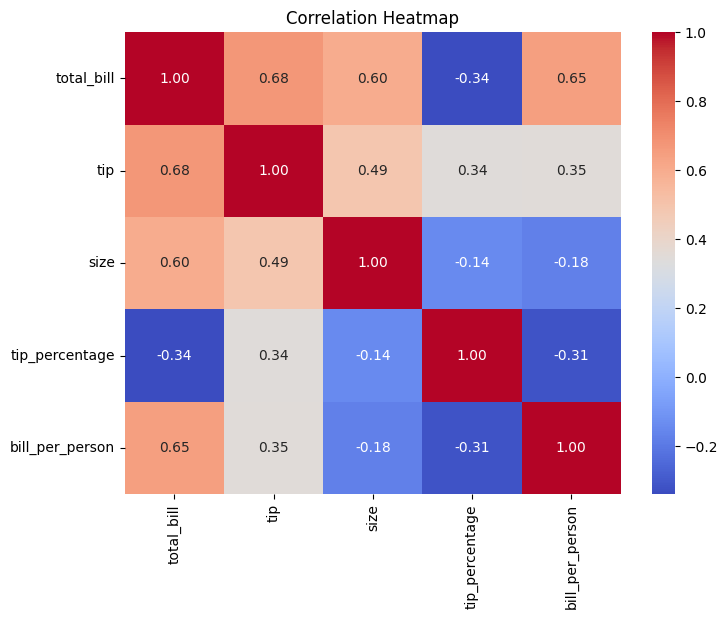


Covariance Matrix:
                  total_bill       tip      size  tip_percentage  \
total_bill        79.252939  8.323502  5.065983      -18.410650   
tip                8.323502  1.914455  0.643906        2.893086   
size               5.065983  0.643906  0.904591       -0.829811   
tip_percentage   -18.410650  2.893086 -0.829811       37.298141   
bill_per_person   16.799144  1.400829 -0.486214       -5.591522   

                 bill_per_person  
total_bill             16.799144  
tip                     1.400829  
size                   -0.486214  
tip_percentage         -5.591522  
bill_per_person         8.493434  


In [22]:
required_cols = ["tip_percentage", "bill_per_person"]
missing_cols = [col for col in required_cols if col not in tips.columns]

if missing_cols:
    print(f"Missing columns: {missing_cols}")

# Calculate 'tip_percentage' and 'bill_per_person' if they don't exist
if "tip_percentage" not in tips.columns:
    tips["tip_percentage"] = (tips["tip"] / tips["total_bill"]) * 100

if "bill_per_person" not in tips.columns:
    tips["bill_per_person"] = tips["total_bill"] / tips["size"]

# Now you can proceed with the correlation and covariance calculation
numerical_cols = ["total_bill", "tip", "size", "tip_percentage", "bill_per_person"]
correlation_matrix = tips[numerical_cols].corr()
covariance_matrix = tips[numerical_cols].cov()

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Display covariance matrix
print("\nCovariance Matrix:\n", covariance_matrix)

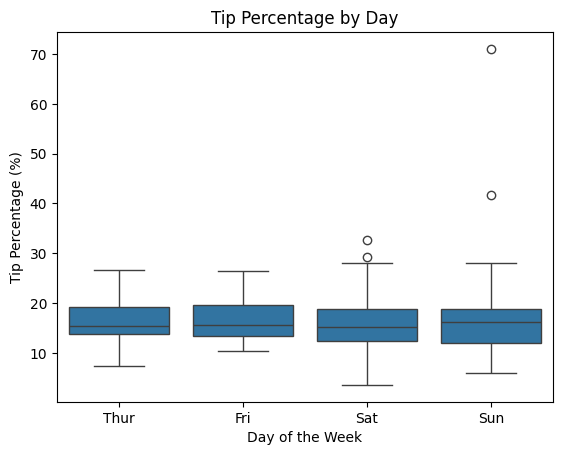

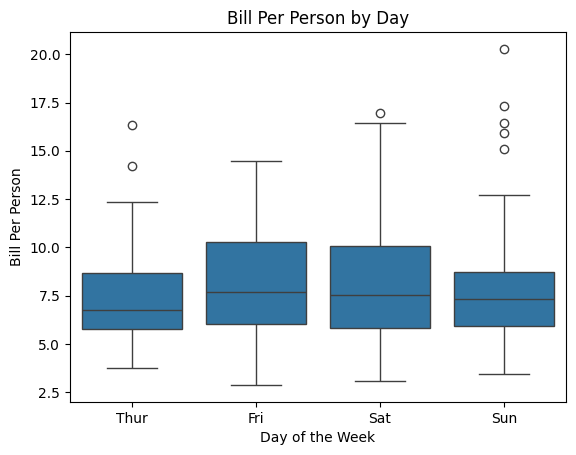

In [ ]:
# Feature: Tip percentage
tips["tip_percentage"] = (tips["tip"] / tips["total_bill"]) * 100

# Visualize the new feature
sns.boxplot(x="day", y="tip_percentage", data=tips)
plt.title("Tip Percentage by Day")
plt.ylabel("Tip Percentage (%)")
plt.xlabel("Day of the Week")
plt.show()

# Feature: Interaction term between size and total bill
tips["bill_per_person"] = tips["total_bill"] / tips["size"]

# Visualize the new feature
sns.boxplot(x="day", y="bill_per_person", data=tips)
plt.title("Bill Per Person by Day")
plt.ylabel("Bill Per Person")
plt.xlabel("Day of the Week")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import simpson
# Simulate index for observations
x = np.arange(len(tips))  # Simulated index for observations
y = np.sort(tips["tip"])  # Sorted tips

# Use Simpson's rule for integration
total_tip = simpson(y, dx=1)
print(f"Total Integrated Tip Amount: {total_tip:.2f} (scaled units)")

Total Integrated Tip Amount: 725.98 (scaled units)
